#  Простые симуляции

Решение задач с помощью симуляций: оценка вероятностей, оценка условных вероятностей, квантильное преобразование, сходимость по вероятности

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

## Упражнение 1 (распределение Пуассона)

Случайная величина $X$ имеет распределение Пуассона с $\lambda = 2$,  $X \sim Pois(2)$. С помощью $10^6$ симуляций оцените: 

* $P(X > 6)$
* $P(X > 6 \mid X > 5)$
* $P(X > 5, X < 7)$
* $E(X^3)$ 
* $E(X \mid X > 5)$

Вбейте получившиеся ответы в переменные `ans1`, `ans2`, $\ldots$, `ans5`. 

In [2]:
poiss_rv = sts.poisson(2)
x = poiss_rv.rvs(size=10**6)

ans1 = np.mean(x > 6)
ans2 = np.mean(x[x > 5] > 6)
ans3 = np.mean((x > 5)&(x < 7))
ans4 = np.mean(x**3)
ans5 = np.mean(x[x > 5])

## Упражнение 2 (нейросети)

Юра завёл себе две нейронные сетки и два сервера для их обучения. Две нейросети обучаются независимо на двух серверах. Время их обучения $T_1$ и $T_2$ равномерно распределено на отрезке $[1;3]$ (обучение измеряется в часах). В процессе обучения сервер может упасть. Момент падения сервера $T$ распределён экспоненциально с параметром $\lambda = 0.3$. Он не зависит от времени обучения нейросеток. 

Известно, что одна из нейросетей успела обучиться, а вторая не успела. Какова вероятность того, что $T \le 1.5$? Ответ вбейте в переменную `ans6`. 

**Hint:** при решении задачи помните о том, что у вас две нейросетки!

In [3]:
T1 = sts.uniform(1,2).rvs(size=10**7) # время обучения первой нейросетки
T2 = sts.uniform(1,2).rvs(size=10**7) # время обучения второй нейросетки
T = sts.expon(scale=1/0.3).rvs(size=10**7) # момент падения сервера

usl1 = (T1 >= T)&(T2 < T) # первая не успела, вторая успела до падения
usl2 = (T1 < T)&(T2 >= T) # первая успела, вторая не успела до падения

In [4]:
len(T[usl1 | usl2]) # проверка достаточно ли событий для оценки

1106005

In [5]:
ans6 = np.mean(T[usl1 | usl2] <= 1.5)# Находим нужную вероятность 
ans6

0.18991324632347956

## Упражнение 3 (квантильное преобразование)

Случайная величина $X$ описывается функцией распределения: 

$$
F(x) = \left( \frac{\ln x}{\ln \theta} \right)^{\alpha},  \quad x \in [1; \theta]
$$

Сгенерируйте из такого распределения выборку объёма $10^6$ и оцените математическое ожидание данной случайной величины. Запишите его в переменную `ans7`. В качестве параметров возьмите $\alpha=2, \theta = 10$.

In [6]:
theta = 10
alpha = 2

y = sts.uniform(0,1).rvs(size=10**6)
x = np.exp(np.log(theta)*y**(1/alpha))
ans7 = np.mean(x)
ans7

5.291830611359959

Нарисуйте для получившегося распределения гистограмму. Найдите в аналитическом виде плотность распределения. Нанесите её на картинку с гистограммой. 

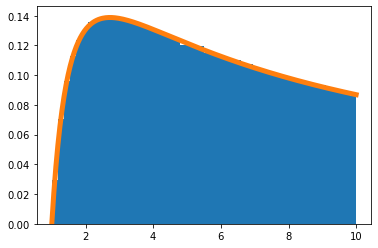

In [7]:
plt.hist(x, bins=50, density=True)

xs = np.linspace(1,10,300)
ys = alpha*(np.log(xs)/np.log(theta))**(alpha-1)*1/np.log(theta)*1/xs
plt.plot(xs, ys, lw=5);

## Упражнение 4 (сходимость по вероятности)

У распределения хи-квадрат есть следующее свойство: если $X_1, \ldots, X_n \sim iid~N(0,1)$, тогда имеет место следующая сходимость по веротяности:

$$
\frac{\chi^2_n}{n} = \frac{X_1^2 + \ldots + X_n^2}{n} \to  1
$$

Продемонстрируйте с помощью симуляций, что это именно так. От вас требуется построить ту же картинку, что мы строили при иллюстрации ЗБЧ в лекции. Не забудьте построить для нескольких разных $\varepsilon$ коридоры и убедиться, что последовательность с некоторого момента начинает пробивать их довольно редко.

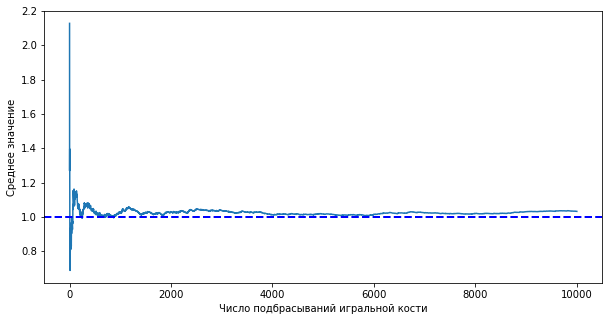

In [9]:
n_obs = 10000

norm_rv = sts.norm(loc=0, scale =1)
x = norm_rv.rvs(size=n_obs)
x2 = x**2
x2_cumsum = np.cumsum(x2)
x2_mean = x2_cumsum / np.arange(1, n_obs+1)
plt.figure(figsize=(10,5))
plt.plot(x2_mean)
plt.axhline(1, color='b', linestyle='dashed', linewidth=2)
plt.xlabel('Число подбрасываний игральной кости')
plt.ylabel('Среднее значение');